<a href="https://colab.research.google.com/github/eramii/eramii/blob/main/%EC%A3%BC%EC%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 957.8 kB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


In [2]:
pip install plotly

In [3]:
pip install pandas openpyxl

In [4]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [5]:
import pandas as pd

# 엑셀 파일 불러오기
excel_file_path = "/content/01.xlsx"
df = pd.read_excel(excel_file_path)

# "Date" 열을 datetime 형식으로 변환 (이미 datetime 형식이라면 이 부분은 생략 가능)
df['Date'] = pd.to_datetime(df['Date'])

# 데이터 기간 설정
start_date = '2020-01-01'
end_date = '2023-10-27'

# 조건을 만족하는 행만 선택
selected_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# 선택된 데이터 확인
print(selected_df.head())


        Date    Open    High     Low   Close      Adj Close  Volume
0 2020-01-02  254500  256000  247500  247500  234366.828125  214585
1 2020-01-03  249000  250500  244500  250000  236734.171875  255475
2 2020-01-06  250000  252000  248000  249500  236260.703125  130109
3 2020-01-07  252000  255000  249000  252500  239101.531250  251361
4 2020-01-08  248000  256500  244000  245000  231999.484375  317886


In [6]:
from prophet import Prophet

df_train = df[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyert1a5q/410hqpsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyert1a5q/u__5qh18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96777', 'data', 'file=/tmp/tmpyert1a5q/410hqpsy.json', 'init=/tmp/tmpyert1a5q/u__5qh18.json', 'output', 'file=/tmp/tmpyert1a5q/prophet_modelowep6kua/prophet_model-20231203055356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

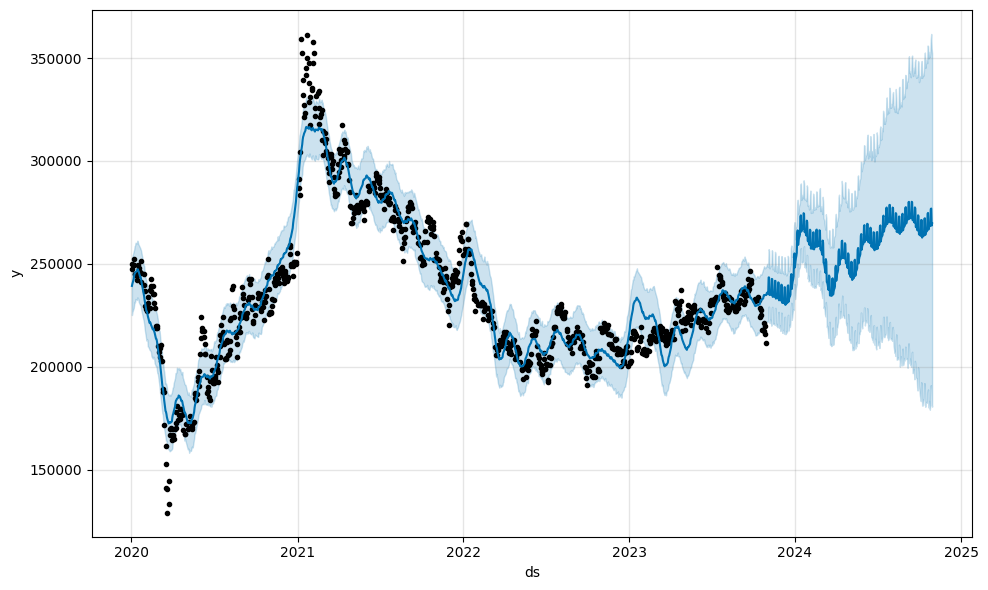

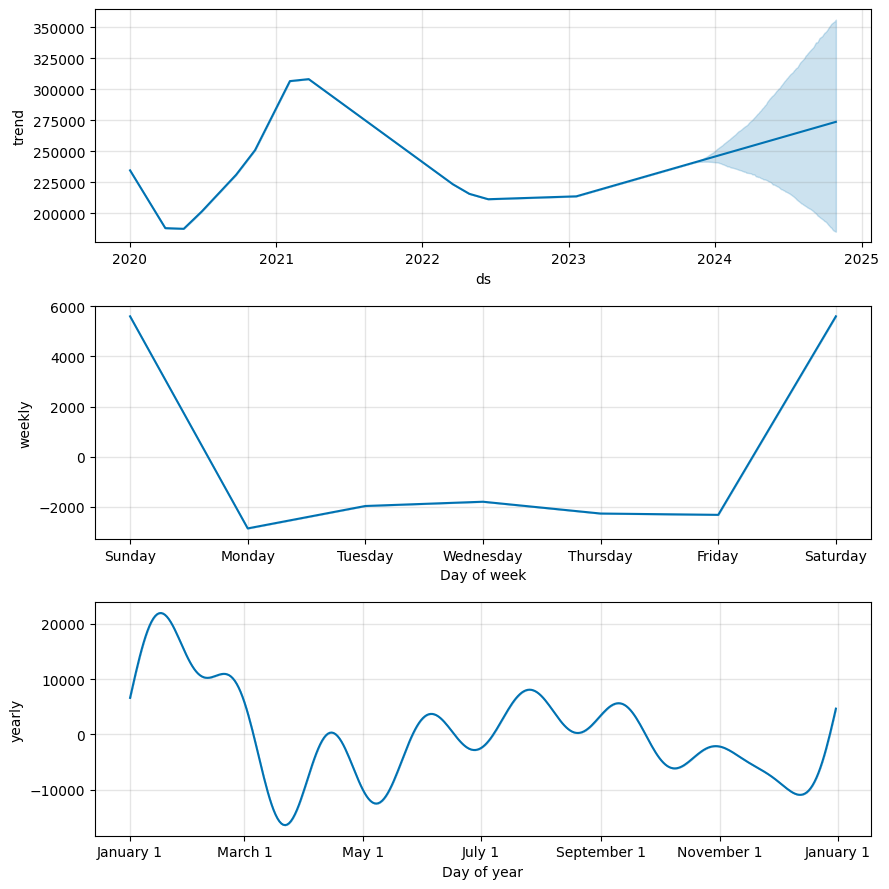

In [8]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [9]:
from fbprophet.plot import plot_plotly, plot_components_plotly

# 2023년 10월 30일까지의 예측
future = m.make_future_dataframe(periods=365)  # 예측 기간을 조절할 수 있음
forecast = m.predict(future)

# 종가에 대한 예측 값 시각화
fig1 = plot_plotly(m, forecast)

# 종가에 대한 예측 값의 구성 성분 시각화
fig2 = plot_components_plotly(m, forecast)



ModuleNotFoundError: ignored

In [ ]:
# 필요한 라이브러리 설치
!pip install pystan==2.19.1.1
!pip install prophet==1.0.1
!pip install cython
!pip install cmdstanpy==0.9.68
!pip install --upgrade plotly

!pip install plotly

# 필요한 패키지 임포트
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
